1. Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
# import copys


2. Read data as a Dataframe

In [2]:
InsuranceDF= pd.read_csv(r"C:\Users\eamaabh\Pictures\Saved Pictures\Project\insurance.csv")

3.Perform basic EDA which should include the following and print out your insights at every step.(28marks)
a.Shape of the data (2marks)
b.Data type of each attribute(2marks)
c.Checking the presence of missing values(3marks)
d.5 point summary of numerical attributes(3marks)
e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
(4marks)
f.Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns(2marks)
g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns(4marks)
h.Distribution of categorical columns (include children)(4marks)
i.Pair plot that includes all the columns of the data frame (4marks)


In [3]:
InsuranceDF.shape

(1338, 7)

In [4]:
InsuranceDF.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
InsuranceDF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
## check this for all the columns
## Remark: No missing Values
InsuranceDF[InsuranceDF['region'].isna()]

,age,sex,bmi,children,smoker,region,charges


In [7]:
## check this for all the columns
## Remark: No missing Values
InsuranceDF.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [8]:
## 5point Summary

InsuranceDF.describe().iloc[3:]

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


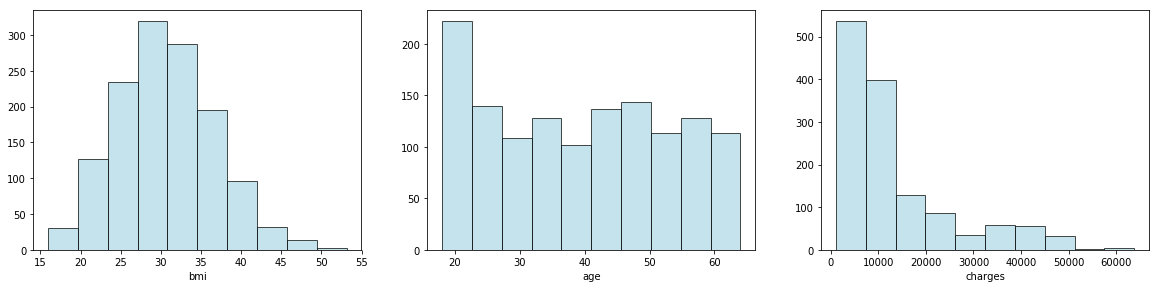

In [9]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(InsuranceDF.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(InsuranceDF.age, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(InsuranceDF.charges, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('charges')

plt.show()

### - bmi looks quiet normally distributed 
### - Age seems be be distributed quiet uniformly 
### - As seen in the previous step, charges are highly skewed

In [10]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(InsuranceDF.bmi),stats.skew(InsuranceDF.age),stats.skew(InsuranceDF.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


### - Skew of bmi is very less as seen in the previous step
### - age is uniformly distributed and there's hardly any skew
### - charges are highly skewed

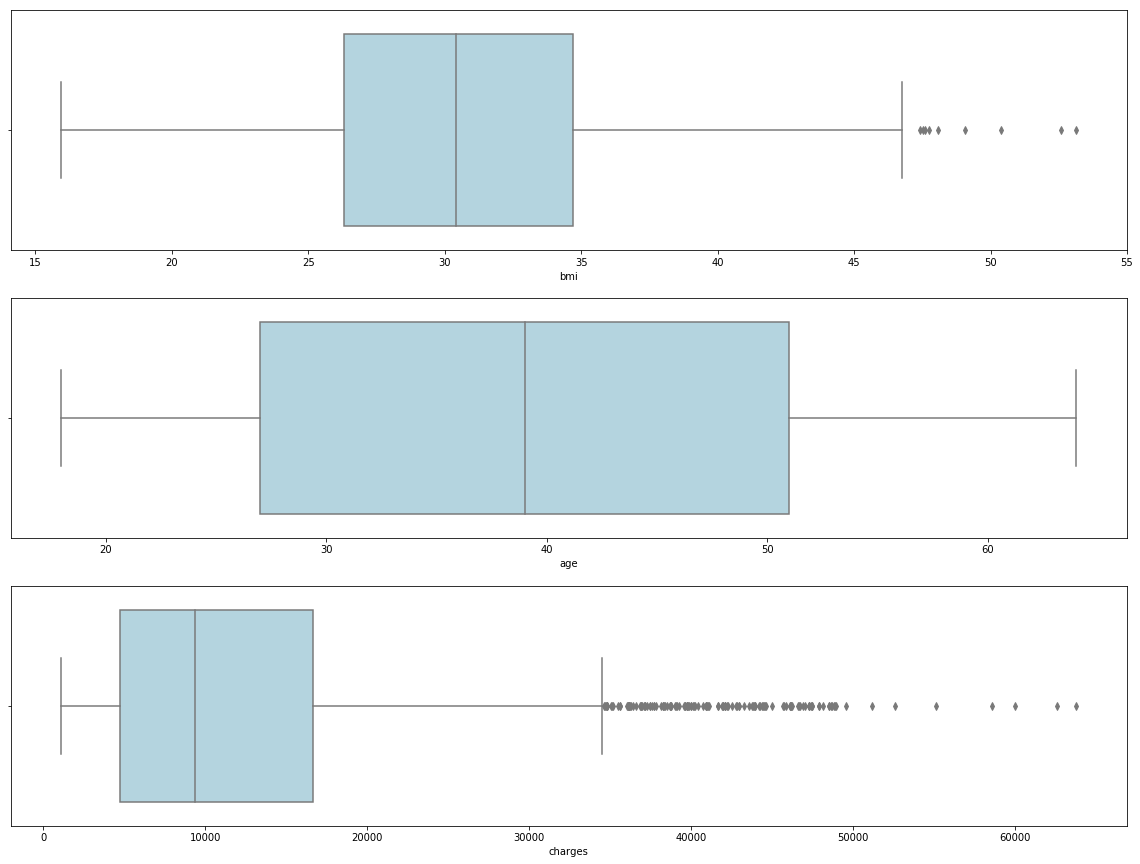

In [11]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= InsuranceDF.bmi, color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(x= InsuranceDF.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x= InsuranceDF.charges, color='lightblue')

plt.show()

### - bmi has a few extreme values 
### - charges as it is highly skewed, there are quiet a lot of extreme values

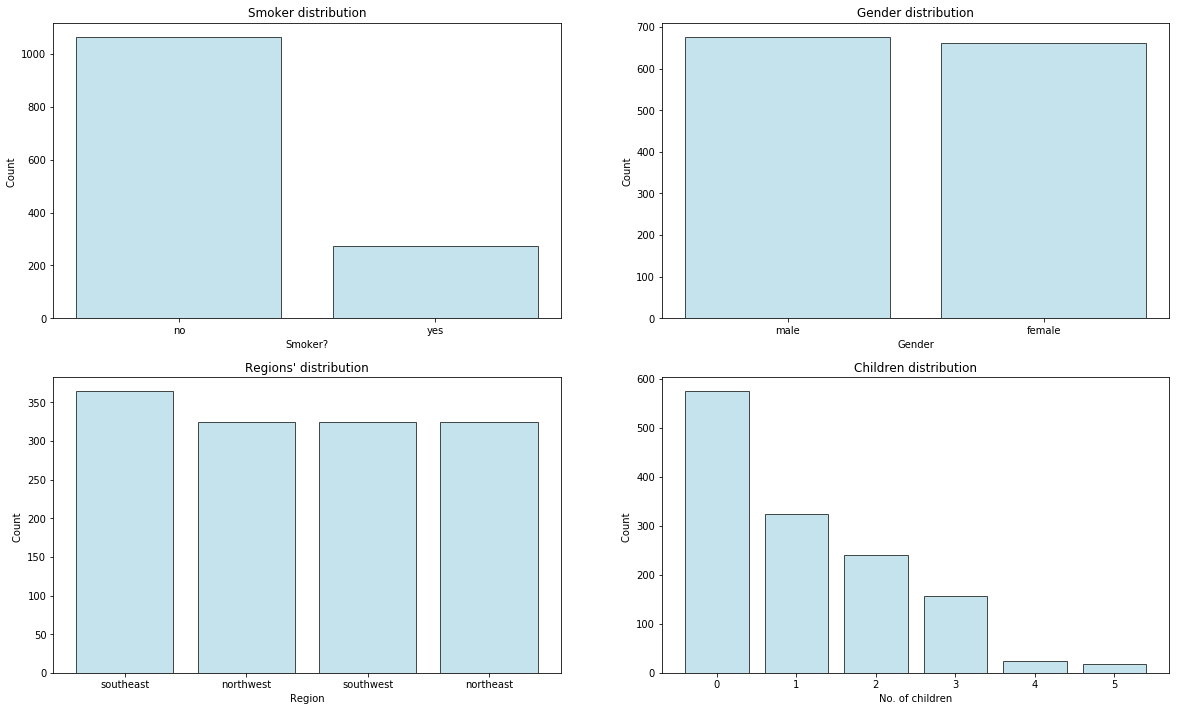

In [13]:
plt.figure(figsize=(20,25))


x = InsuranceDF.smoker.value_counts().index    #Values for x-axis
y = [InsuranceDF['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = InsuranceDF.sex.value_counts().index    #Values for x-axis
y1 = [InsuranceDF['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = InsuranceDF.region.value_counts().index    #Values for x-axis
y2 = [InsuranceDF['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = InsuranceDF.children.value_counts().index    #Values for x-axis
y3 = [InsuranceDF['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()


### - There are a lot more non-smokers than there are smokers in the data
### - Instances are distributed evenly accross all regions
### - Gender is also distributed evenly
### - Most instances have less than 2 children and very few have 4 or 5 children

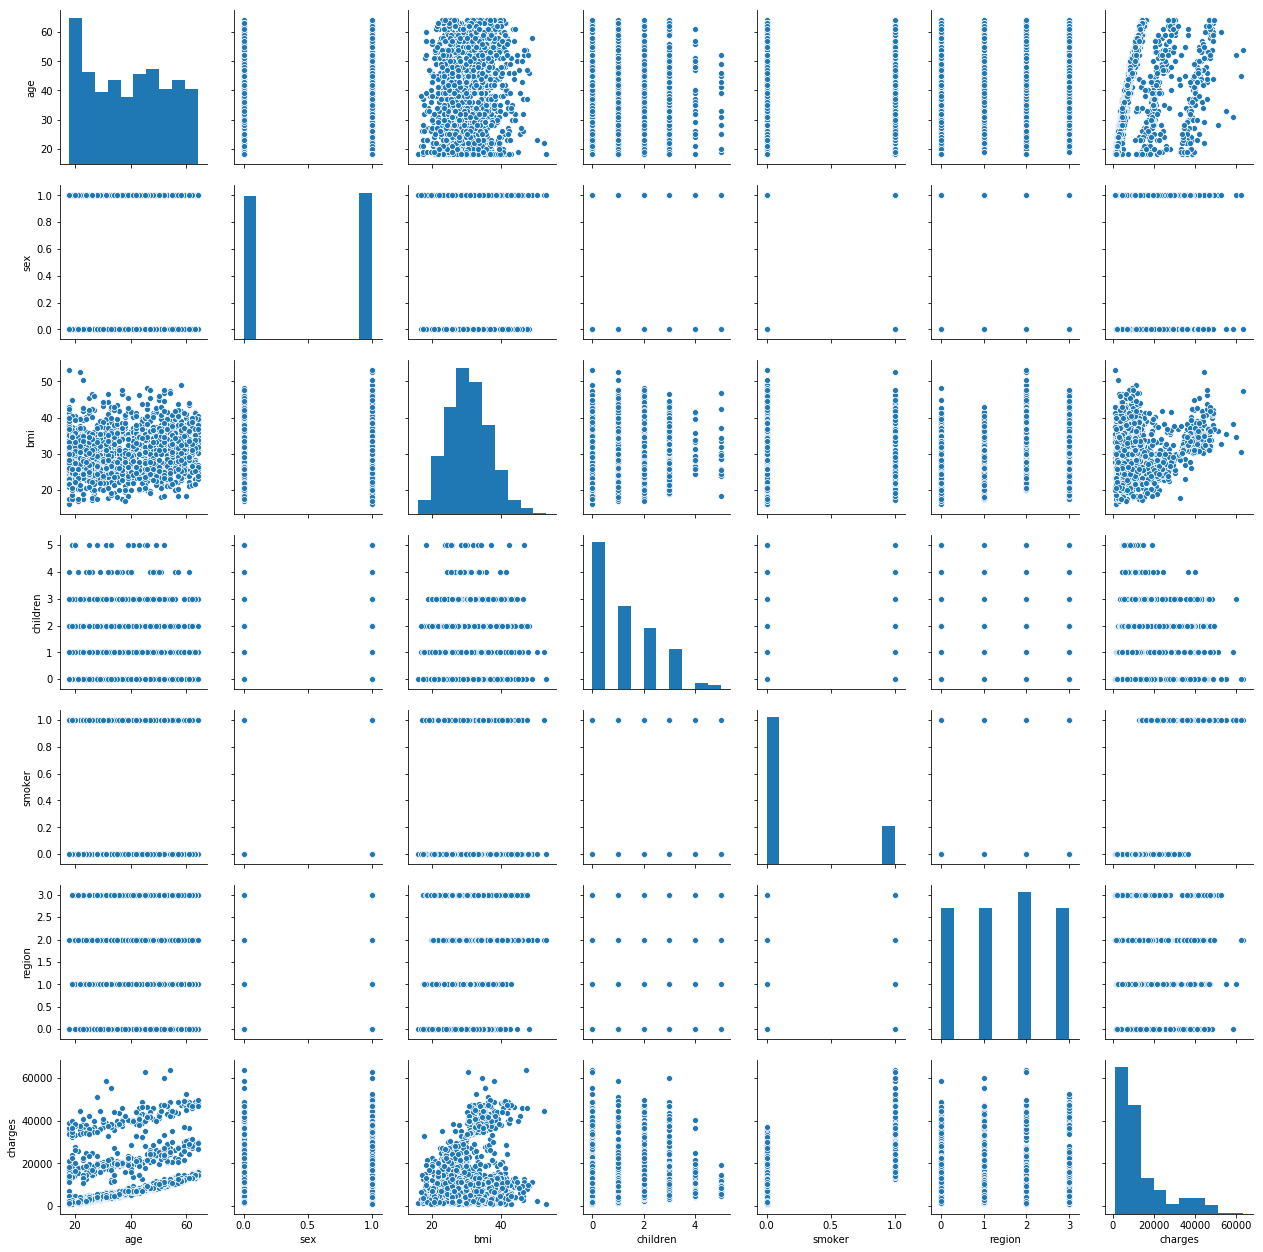

In [14]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = InsuranceDF.copy()
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

### - The only obvious correlation of 'charges' is with 'smoker' 
### - Looks like smokers claimed more money than non-smokers
### - There's an interesting pattern between 'age' and 'charges. Could be because for the same ailment, older people are charged more than the younger ones

## Do charges of people who smoke differ significantly from the people who don't?

In [15]:
InsuranceDF.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

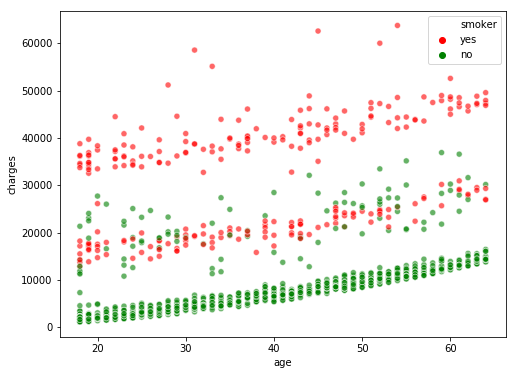

In [16]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(InsuranceDF.age, InsuranceDF.charges,hue=InsuranceDF.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

### - Visually the difference between charges of smokers and charges of non-smokers is apparent

## Does bmi of males differ significantly from that of females?

In [19]:
InsuranceDF.sex.value_counts()   #Checking the distribution of males and females

male      676
female    662
Name: sex, dtype: int64

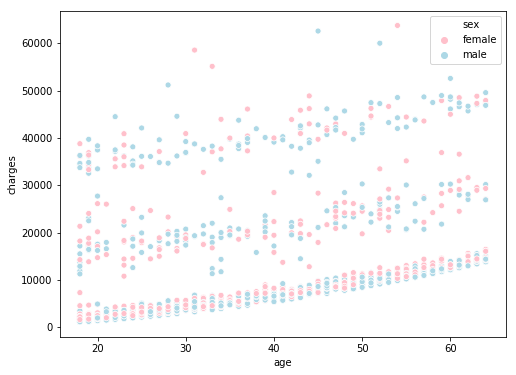

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(InsuranceDF.age, InsuranceDF.charges,hue=InsuranceDF.sex,palette= ['pink','lightblue'] )
plt.show()

### - Visually, there is no apparent relation between gender and charges

## Is the proportion of smokers significantly different in different genders?

In [22]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(InsuranceDF['sex'],InsuranceDF['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


##### * Proportion of smokers in males is significantly different from that of the females

In [23]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(InsuranceDF['smoker'], InsuranceDF['region'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


##### * Smoking haboits of people of different regions are similar

## Is the distribution of bmi across women with no children, one child and two children, the same ?

In [25]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = (InsuranceDF[InsuranceDF['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05


##### *BMI is not changed by the number of children a women has